In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=sns.load_dataset('tips')

# Exploratory Data Analysis(EDA).

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [5]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
df[df.duplicated]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


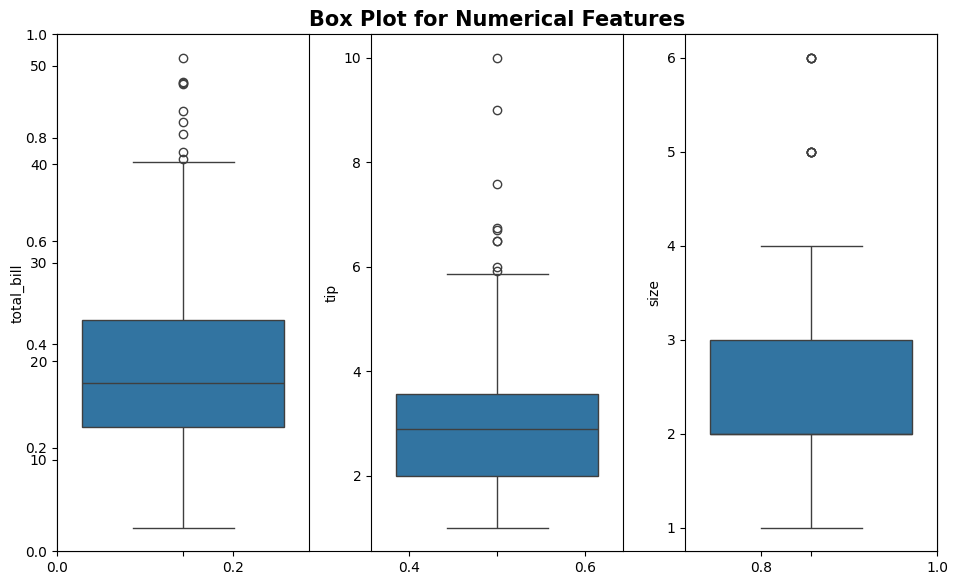

In [10]:
df_col = df.select_dtypes(include='number').columns
plt.figure(figsize=(10,6))
plt.title('Box Plot for Numerical Features',fontsize=15,fontweight='bold')
for i,col in enumerate(df_col):
    
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col],data=df)

    plt.ylabel(col)
    plt.tight_layout()



# Feature Engineering

In [11]:
df1 = df.copy()

In [12]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encoder = OneHotEncoder(drop="first",sparse_output=False)
encoder1 = LabelEncoder()

In [14]:
col_to_encode=df1.iloc[:,2:-2]

In [15]:
encoded=encoder.fit_transform(col_to_encode)
df1['time'] = encoder1.fit_transform(df1['time'])
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,0,2
1,10.34,1.66,Male,No,Sun,0,3
2,21.01,3.50,Male,No,Sun,0,3
3,23.68,3.31,Male,No,Sun,0,2
4,24.59,3.61,Female,No,Sun,0,4


In [16]:
df2 = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [17]:
df2.head()

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [18]:
df1 = pd.concat([df1,df2],axis=1)
df1.drop(columns=col_to_encode.columns,inplace=True)
df1.head()

,total_bill,tip,time,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur
0,16.99,1.01,0,2,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,0,3,1.0,0.0,0.0,1.0,0.0
2,21.01,3.50,0,3,1.0,0.0,0.0,1.0,0.0
3,23.68,3.31,0,2,1.0,0.0,0.0,1.0,0.0
4,24.59,3.61,0,4,0.0,0.0,0.0,1.0,0.0


In [19]:
df1.describe()

,total_bill,tip,time,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.278689,2.569672,0.643443,0.381148,0.356557,0.311475,0.254098
std,8.902412,1.383638,0.449276,0.951100,0.479967,0.486667,0.479967,0.464049,0.436248
min,3.070000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.347500,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.795000,2.900000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,24.127500,3.562500,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,50.810000,10.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df1["time"].value_counts()

time
0    176
1     68
Name: count, dtype: int64

In [21]:
X = df1.drop(columns='time')
y = df1['time']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((195, 8), (49, 8), (195,), (49,))

In [24]:
X_train.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur
228,13.28,2.72,2,1.0,0.0,1.0,0.0,0.0
208,24.27,2.03,2,1.0,1.0,1.0,0.0,0.0
96,27.28,4.00,2,1.0,1.0,0.0,0.0,0.0
167,31.71,4.50,4,1.0,0.0,0.0,1.0,0.0
84,15.98,2.03,2,1.0,0.0,0.0,0.0,1.0


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['total_bill','tip','size']] = scaler.fit_transform(X_train[['total_bill','tip','size']])
X_test[['total_bill','tip','size']] = scaler.transform(X_test[['total_bill','tip','size']])


In [26]:
X_train

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur
228,-0.793062,-0.258033,-0.612141,1.0,0.0,1.0,0.0,0.0
208,0.463227,-0.742114,-0.612141,1.0,1.0,1.0,0.0,0.0
96,0.807307,0.639973,-0.612141,1.0,1.0,0.0,0.0,0.0
167,1.313709,0.990757,1.519421,1.0,0.0,0.0,1.0,0.0
84,-0.484419,-0.742114,-0.612141,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
106,0.031128,0.682067,-0.612141,1.0,1.0,1.0,0.0,0.0
14,-0.615878,-0.047563,-0.612141,0.0,0.0,0.0,1.0,0.0
92,-1.653831,-1.464729,-0.612141,0.0,1.0,0.0,0.0,0.0
179,1.647500,0.324268,-0.612141,1.0,1.0,0.0,1.0,0.0


In [27]:
X_test.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur
24,-0.045461,0.064688,-0.612141,1.0,0.0,1.0,0.0,0.0
6,-1.308609,-0.763161,-0.612141,1.0,0.0,0.0,1.0,0.0
153,0.495235,-0.763161,1.519421,1.0,0.0,0.0,1.0,0.0
211,0.648413,1.453792,1.519421,1.0,1.0,1.0,0.0,0.0
198,-0.825069,-0.763161,-0.612141,0.0,1.0,0.0,0.0,1.0


In [28]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report
print('Accuracy Score : ',accuracy_score(y_test,y_pred))
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))
print('Classification Report : \n',classification_report(y_test,y_pred))

Accuracy Score :  0.9591836734693877
Confusion Matrix : 
 [[32  2]
 [ 0 15]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.88      1.00      0.94        15

    accuracy                           0.96        49
   macro avg       0.94      0.97      0.95        49
weighted avg       0.96      0.96      0.96        49



In [31]:
train_pred = model.predict(X_train)
print('Train Accuracy Score : ',accuracy_score(y_train,train_pred))




Train Accuracy Score :  0.9435897435897436


In [32]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred2))
print('confusion_matrix : \n',confusion_matrix(y_test,y_pred2))
print('Classification Report : \n',classification_report(y_test,y_pred2))

Accuracy Score :  1.0
confusion_matrix : 
 [[34  0]
 [ 0 15]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        15

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49

